In [25]:
import tensorflow as tf
import numpy as np
import pylab as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 4)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [6]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


In [7]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [8]:
sess = tf.InteractiveSession()

In [9]:
tf.global_variables_initializer().run()

In [10]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [13]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9146


Text(0.5,1,'[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]')

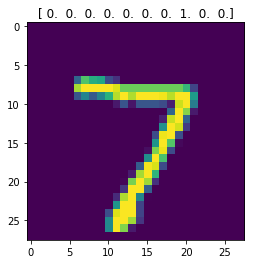

In [21]:
im_num = 0
plt.imshow(mnist.test.images[im_num,:].reshape((28,28)))
plt.title(mnist.test.labels[im_num])

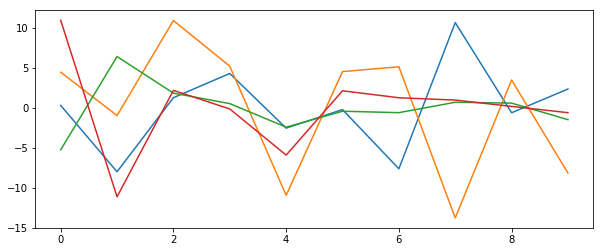

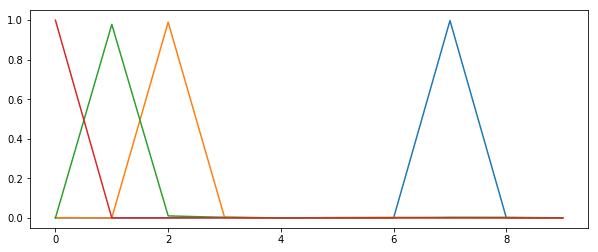

In [39]:
# probs = sess.run(tf.matmul(x, W) + b, feed_dict={x: mnist.test.images[im_num,:][np.newaxis,:]})
probs = sess.run(tf.matmul(x, W) + b, feed_dict={x: mnist.test.images[:4,:]})
probs2 = sess.run(y, feed_dict={x: mnist.test.images[:4,:]})

plt.plot(probs.T)
plt.show()
plt.plot(probs2.T);

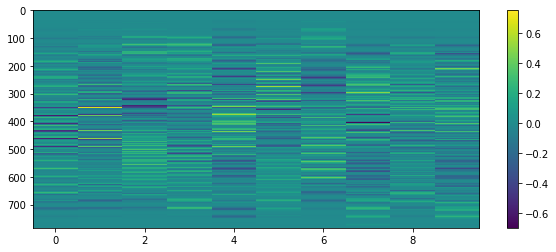

In [49]:
probs = sess.run(W, feed_dict={x: mnist.test.images[im_num,:][np.newaxis,:]})
plt.imshow(probs,aspect='auto')
plt.colorbar()

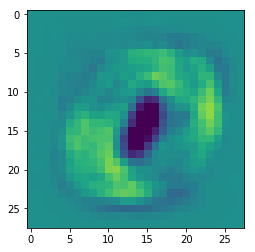

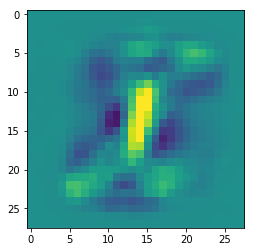

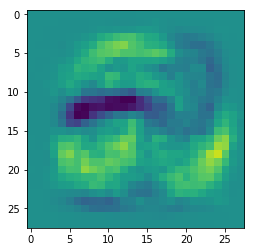

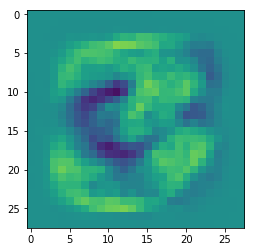

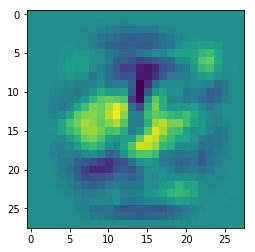

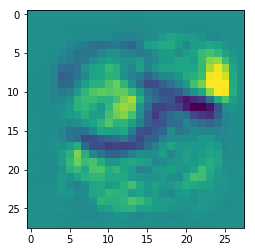

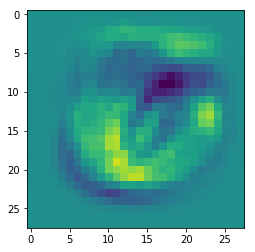

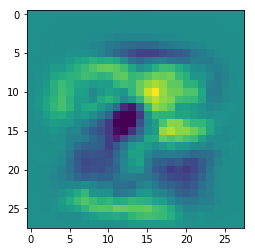

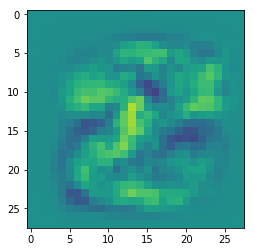

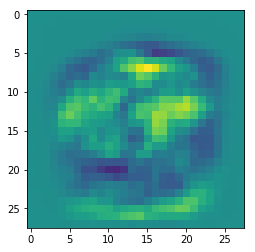

In [50]:
for digit in range(10):
    plt.imshow(probs[:,digit].reshape(28,28),vmin=-.5,vmax=.5)
    plt.show()